In [1]:
from opensoundscape.preprocess.preprocessors import BasePreprocessor, AudioToSpectrogramPreprocessor, CnnPreprocessor
import torch
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
from opensoundscape.torch.models import cnn
from opensoundscape.torch.architectures import cnn_architectures
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from opensoundscape.annotations import categorical_to_one_hot
import matplotlib.pyplot as plt
from opensoundscape.torch.models.cnn import load_model

In [2]:
valid_labels_df = pd.read_csv("valid_labels_df.csv").set_index("Unnamed: 0")

valid_preds_df = pd.read_csv("valid_preds_df.csv").set_index("Unnamed: 0")

valid_scores_df = pd.read_csv("valid_scores_df.csv").set_index("Unnamed: 0")
valid_preds_df

,Microcerculus marginatus,Myioborus miniatus,Thraupis episcopus,Ramphastos tucanus,Xiphorhynchus guttatus,no bird,Celeus grammicus,Zonotrichia capensis,Trogon viridis,Turdus leucomelas,Tolmomyias sulphurescens
Unnamed: 0,,,,,,,,,,,
D:/open_soundscape_files/./Cosmos_data/Testing/XC87449 - Scaly-breasted Woodpecker - Celeus grammicus subcervinus_0.0.wav,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D:/open_soundscape_files/./Cosmos_data/Testing/XC87449 - Scaly-breasted Woodpecker - Celeus grammicus subcervinus_3.0.wav,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
D:/open_soundscape_files/./Cosmos_data/Testing/XC87449 - Scaly-breasted Woodpecker - Celeus grammicus subcervinus_6.0.wav,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
D:/open_soundscape_files/./Cosmos_data/Testing/XC87449 - Scaly-breasted Woodpecker - Celeus grammicus subcervinus_9.0.wav,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
D:/open_soundscape_files/./Cosmos_data/Testing/XC87449 - Scaly-breasted Woodpecker - Celeus grammicus subcervinus_12.0.wav,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
D:/open_soundscape_files/./Cosmos_data/Testing/XC27942 - Yellow-olive Flatbill - Tolmomyias sulphurescens_15.0.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
D:/open_soundscape_files/./Cosmos_data/Testing/XC27942 - Yellow-olive Flatbill - Tolmomyias sulphurescens_18.0.wav,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
D:/open_soundscape_files/./Cosmos_data/Testing/XC27942 - Yellow-olive Flatbill - Tolmomyias sulphurescens_21.0.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
print(classification_report(valid_labels_df, valid_preds_df, target_names=valid_scores_df.columns))

                          precision    recall  f1-score   support

Microcerculus marginatus       0.70      0.86      0.77       439
      Myioborus miniatus       0.41      0.97      0.58       314
      Thraupis episcopus       0.41      0.87      0.55       248
      Ramphastos tucanus       0.85      0.96      0.90       552
  Xiphorhynchus guttatus       0.59      0.83      0.69       335
                 no bird       0.66      0.44      0.53      1752
        Celeus grammicus       0.38      0.78      0.51       224
    Zonotrichia capensis       0.71      0.86      0.78       398
          Trogon viridis       0.60      0.83      0.70       357
       Turdus leucomelas       0.79      0.78      0.79       493
Tolmomyias sulphurescens       0.70      0.83      0.76       368

               micro avg       0.62      0.73      0.67      5480
               macro avg       0.62      0.82      0.69      5480
            weighted avg       0.65      0.73      0.67      5480
        

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
(valid_labels_df == valid_preds_df).sum(axis=1).value_counts()

11    3978
9     1502
10     954
dtype: int64

In [5]:
#11 => correct
valid_preds_df[(valid_labels_df == valid_preds_df).sum(axis=1) == 9].shape[0]

1502

In [6]:
#valid_preds_df.loc[((valid_labels_df == valid_preds_df).sum(axis=1) == 10), "no bird"] = 1
#valid_preds_df

In [7]:
print(classification_report(valid_labels_df, valid_preds_df, target_names=valid_scores_df.columns))

                          precision    recall  f1-score   support

Microcerculus marginatus       0.70      0.86      0.77       439
      Myioborus miniatus       0.41      0.97      0.58       314
      Thraupis episcopus       0.41      0.87      0.55       248
      Ramphastos tucanus       0.85      0.96      0.90       552
  Xiphorhynchus guttatus       0.59      0.83      0.69       335
                 no bird       0.66      0.44      0.53      1752
        Celeus grammicus       0.38      0.78      0.51       224
    Zonotrichia capensis       0.71      0.86      0.78       398
          Trogon viridis       0.60      0.83      0.70       357
       Turdus leucomelas       0.79      0.78      0.79       493
Tolmomyias sulphurescens       0.70      0.83      0.76       368

               micro avg       0.62      0.73      0.67      5480
               macro avg       0.62      0.82      0.69      5480
            weighted avg       0.65      0.73      0.67      5480
        

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
(((valid_labels_df == valid_preds_df).sum(axis=1)) == 9).sum()

1502

In [9]:
no_bird_clips = valid_preds_df.loc[(valid_labels_df["no bird"] == 1)]

In [10]:
no_bird_clips[no_bird_clips["no bird"] == 0].describe().loc["mean"]

Microcerculus marginatus    0.090724
Myioborus miniatus          0.213048
Thraupis episcopus          0.213048
Ramphastos tucanus          0.012232
Xiphorhynchus guttatus      0.060143
no bird                     0.000000
Celeus grammicus            0.130479
Zonotrichia capensis        0.078491
Trogon viridis              0.134557
Turdus leucomelas           0.039755
Tolmomyias sulphurescens    0.027523
Name: mean, dtype: float64

In [11]:
import IPython.lib.display as dis
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

In [62]:
file = no_bird_clips[no_bird_clips["no bird"] == 0].sample(1).index[0]
print("'TRUE' LABEL: ",valid_labels_df.loc[file])
print("MODEL OUTPUT: ", valid_preds_df.loc[file])

'TRUE' LABEL:  Microcerculus marginatus    0
Myioborus miniatus          0
Thraupis episcopus          0
Ramphastos tucanus          0
Xiphorhynchus guttatus      0
no bird                     1
Celeus grammicus            0
Zonotrichia capensis        0
Trogon viridis              0
Turdus leucomelas           0
Tolmomyias sulphurescens    0
Name: D:/open_soundscape_files/./Cosmos_data/Testing/XC468091 - Slate-throated Whitestart - Myioborus miniatus_30.0.wav, dtype: int64
MODEL OUTPUT:  Microcerculus marginatus    0.0
Myioborus miniatus          1.0
Thraupis episcopus          0.0
Ramphastos tucanus          0.0
Xiphorhynchus guttatus      0.0
no bird                     0.0
Celeus grammicus            0.0
Zonotrichia capensis        0.0
Trogon viridis              0.0
Turdus leucomelas           0.0
Tolmomyias sulphurescens    0.0
Name: D:/open_soundscape_files/./Cosmos_data/Testing/XC468091 - Slate-throated Whitestart - Myioborus miniatus_30.0.wav, dtype: float64


In [59]:
file = no_bird_clips[no_bird_clips["no bird"] == 0].sample(1).index[0]
print("'TRUE' LABEL: ",valid_labels_df.loc[file])
print("MODEL OUTPUT: ", valid_preds_df.loc[file])

'TRUE' LABEL:  Microcerculus marginatus    0
Myioborus miniatus          0
Thraupis episcopus          0
Ramphastos tucanus          0
Xiphorhynchus guttatus      0
no bird                     1
Celeus grammicus            0
Zonotrichia capensis        0
Trogon viridis              0
Turdus leucomelas           0
Tolmomyias sulphurescens    0
Name: D:/open_soundscape_files/./Cosmos_data/Testing/XC47508 - Blue-grey Tanager - Thraupis episcopus_33.0.wav, dtype: int64
MODEL OUTPUT:  Microcerculus marginatus    0.0
Myioborus miniatus          0.0
Thraupis episcopus          1.0
Ramphastos tucanus          0.0
Xiphorhynchus guttatus      0.0
no bird                     0.0
Celeus grammicus            0.0
Zonotrichia capensis        0.0
Trogon viridis              0.0
Turdus leucomelas           0.0
Tolmomyias sulphurescens    0.0
Name: D:/open_soundscape_files/./Cosmos_data/Testing/XC47508 - Blue-grey Tanager - Thraupis episcopus_33.0.wav, dtype: float64


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Microcerculus marginatus    0
Myioborus miniatus          0
Thraupis episcopus          0
Ramphastos tucanus          0
Xiphorhynchus guttatus      0
no bird                     1
Celeus grammicus            0
Zonotrichia capensis        0
Trogon viridis              0
Turdus leucomelas           0
Tolmomyias sulphurescens    0
Name: D:/open_soundscape_files/./Cosmos_data/Testing/XC226021 - Slate-throated Whitestart - Myioborus miniatus_12.0.wav, dtype: int64 Microcerculus marginatus    0.0
Myioborus miniatus          1.0
Thraupis episcopus          0.0
Ramphastos tucanus          0.0
Xiphorhynchus guttatus      0.0
no bird                     0.0
Celeus grammicus            0.0
Zonotrichia capensis        0.0
Trogon viridis              0.0
Turdus leucomelas           0.0
Tolmomyias sulphurescens    0.0
Name: D:/open_soundscape_files/./Cosmos_data/Testing/XC226021 - Slate-throated Whitestart - Myioborus miniatus_12.0.wav, dtype: float64


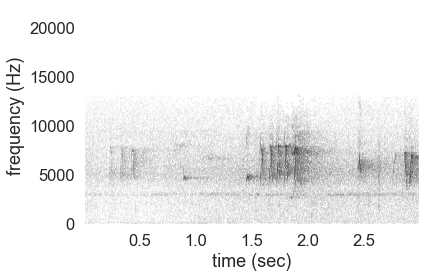

In [58]:
file = no_bird_clips[no_bird_clips["no bird"] == 0].sample(1).index[0]
print(valid_labels_df.loc[file], valid_preds_df.loc[file])
audio_object = Audio.from_file(file)
spectrogram_object = Spectrogram.from_audio(audio_object)
display(dis.Audio(file,autoplay=True))
spectrogram_object.plot()

In [13]:
((valid_labels_df["no bird"] == 1) & (valid_preds_df["no bird"] == 1)).sum()

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


771

In [14]:
((valid_labels_df["no bird"] == 1) & (valid_preds_df["no bird"] == 0)).sum()

981

In [15]:
((valid_labels_df["no bird"] == 0) & (valid_preds_df["no bird"] == 0)).sum()

4278

In [16]:
((valid_labels_df["no bird"] == 0) & (valid_preds_df["no bird"] == 1)).sum()

404

In [17]:
troubling_clips = valid_preds_df.loc[(valid_labels_df["no bird"] == 1) & (valid_preds_df["no bird"] == 0)]
troubling_clips = troubling_clips.reset_index()
troubling_clips["weak label"] = troubling_clips["Unnamed: 0"].str.split(" - ").apply(lambda x: x[2]).str.split(" ").apply(lambda x: x[0])

In [18]:
pd.Series(troubling_clips.columns.str.split(" ")).apply(lambda x: x[0])

0          Unnamed:
1     Microcerculus
2         Myioborus
3          Thraupis
4        Ramphastos
5     Xiphorhynchus
6                no
7            Celeus
8       Zonotrichia
9            Trogon
10           Turdus
11       Tolmomyias
12             weak
dtype: object

In [19]:
troubling_clips.columns

Index(['Unnamed: 0', 'Microcerculus marginatus', 'Myioborus miniatus',
       'Thraupis episcopus', 'Ramphastos tucanus', 'Xiphorhynchus guttatus',
       'no bird', 'Celeus grammicus', 'Zonotrichia capensis', 'Trogon viridis',
       'Turdus leucomelas', 'Tolmomyias sulphurescens', 'weak label'],
      dtype='object')

In [20]:
cols = ['Microcerculus marginatus', 'Myioborus miniatus',
       'Thraupis episcopus', 'Ramphastos tucanus', 'Xiphorhynchus guttatus',
       'no bird', 'Celeus grammicus', 'Zonotrichia capensis', 'Trogon viridis',
       'Turdus leucomelas', 'Tolmomyias sulphurescens']
for col in cols:
    
    troubling_clips[col] = troubling_clips[col].replace({1: col.split(" ")[0], 0: np.NaN})
troubling_clips["strong label"] = troubling_clips[cols].apply(lambda x: x[~x.isnull()].iloc[0], axis=1)

In [21]:
troubling_clips = troubling_clips[['Unnamed: 0', "strong label", "weak label"]]
troubling_clips

,Unnamed: 0,strong label,weak label
0,D:/open_soundscape_files/./Cosmos_data/Testing...,Xiphorhynchus,Celeus
1,D:/open_soundscape_files/./Cosmos_data/Testing...,Celeus,Celeus
2,D:/open_soundscape_files/./Cosmos_data/Testing...,Xiphorhynchus,Celeus
3,D:/open_soundscape_files/./Cosmos_data/Testing...,Xiphorhynchus,Celeus
4,D:/open_soundscape_files/./Cosmos_data/Testing...,Microcerculus,Celeus
...,...,...,...
976,D:/open_soundscape_files/./Cosmos_data/Testing...,Tolmomyias,Tolmomyias
977,D:/open_soundscape_files/./Cosmos_data/Testing...,Thraupis,Tolmomyias
978,D:/open_soundscape_files/./Cosmos_data/Testing...,Tolmomyias,Tolmomyias
979,D:/open_soundscape_files/./Cosmos_data/Testing...,Xiphorhynchus,Tolmomyias


In [22]:
(troubling_clips["strong label"] == troubling_clips["weak label"]).sum()/troubling_clips.shape[0]

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6340468909276249

```troubling_clips = valid_preds_df.loc[(valid_labels_df["no bird"] == 1) & (valid_preds_df["no bird"] == 0)]```


In [31]:
test = troubling_clips.groupby("strong label").apply(lambda s: s["weak label"].value_counts(normalize=True)).reset_index()
test= test.rename({"strong label": "strong label by model", "weak label":"percentage of files with weak label","level_1":"weak label"}, axis="columns")
test

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,strong label by model,weak label,percentage of files with weak label
0,Celeus,Celeus,0.718750
1,Celeus,Trogon,0.132812
2,Celeus,Ramphastos,0.062500
3,Celeus,Tolmomyias,0.046875
4,Celeus,Microcerculus,0.015625
...,...,...,...
61,Xiphorhynchus,Ramphastos,0.016949
62,Zonotrichia,Zonotrichia,0.727273
63,Zonotrichia,Thraupis,0.220779
64,Zonotrichia,Tolmomyias,0.038961


In [32]:
import seaborn as sns


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersi

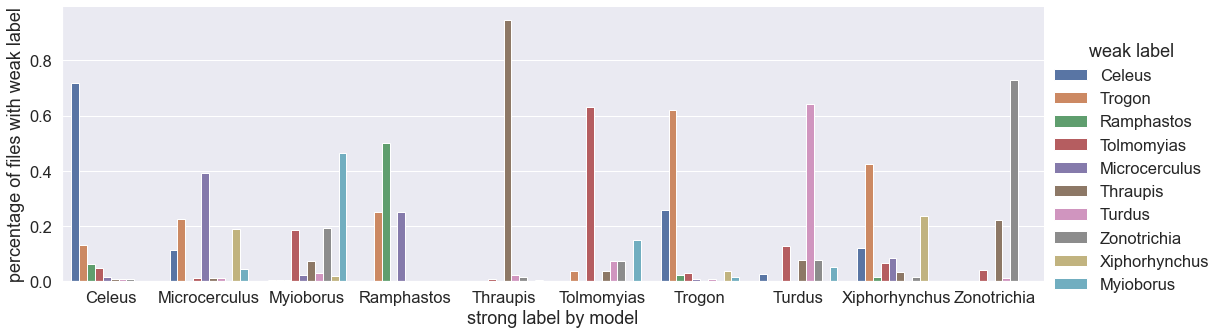

In [34]:
sns.set(font_scale = 1.5)
sns.catplot(x = "strong label by model",       # x variable name
            y = "percentage of files with weak label",       # y variable name
            hue = "weak label",  # group variable name
            data = test,     # dataframe to plot
            kind = "bar",
           aspect=3,
           height=5) #title="distrubiton of weaks labels for each strong label by model"

In [48]:
troubling_clips

,Unnamed: 0,strong label,weak label
0,D:/open_soundscape_files/./Cosmos_data/Testing...,Xiphorhynchus,Celeus
1,D:/open_soundscape_files/./Cosmos_data/Testing...,Celeus,Celeus
2,D:/open_soundscape_files/./Cosmos_data/Testing...,Xiphorhynchus,Celeus
3,D:/open_soundscape_files/./Cosmos_data/Testing...,Xiphorhynchus,Celeus
4,D:/open_soundscape_files/./Cosmos_data/Testing...,Microcerculus,Celeus
...,...,...,...
976,D:/open_soundscape_files/./Cosmos_data/Testing...,Tolmomyias,Tolmomyias
977,D:/open_soundscape_files/./Cosmos_data/Testing...,Thraupis,Tolmomyias
978,D:/open_soundscape_files/./Cosmos_data/Testing...,Tolmomyias,Tolmomyias
979,D:/open_soundscape_files/./Cosmos_data/Testing...,Xiphorhynchus,Tolmomyias


In [50]:
#https://dsc80.com/resources/lectures/lec10/lec10.html
def tvd_of_groups(df, groups, cats):
    '''groups: the binary column (e.g. married vs. unmarried).
       cats: the categorical column (e.g. employment status).
    '''
    cnts = df.pivot_table(index=cats, columns=groups, aggfunc='size')
    # Normalize each column.
    distr = cnts / cnts.sum()
    # Compute and return the TVD.
    return distr.diff(axis=1).iloc[:, -1].abs().sum() / 2 

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
obsreved_stat = tvd_of_groups(troubling_clips, "strong label", "weak label")
obsreved_stat

0.463020030816641

In [55]:
results = []
for n in range(1000):
    troubling_clips= troubling_clips.assign(shuffled_strong=np.random.permutation(troubling_clips["strong label"]))
    results.append(tvd_of_groups(troubling_clips, "shuffled_strong", "weak label"))
print(results)

[0.21725731895223419, 0.23640766013647369, 0.08133392031697115, 0.16574950473255556, 0.14802993616552937, 0.10081443979749062, 0.16068677085626235, 0.13185119964780984, 0.19678626458287476, 0.16530926700418228, 0.15595421527624917, 0.18335901386748843, 0.20206911732335459, 0.19172353070658152, 0.17191283292978204, 0.28329297820823246, 0.15551397754787585, 0.1486902927580894, 0.21384547655734096, 0.2006383447061413, 0.1599163548316091, 0.1600264142637024, 0.1155624036979969, 0.14483821263482283, 0.18666079683028836, 0.2234206471494607, 0.18732115342284833, 0.11776359233986353, 0.15837552278230244, 0.16244772176975567, 0.19964780981730135, 0.1730134272507154, 0.16795069337442217, 0.10004402377283733, 0.16718027734976887, 0.18622055910191504, 0.12282632621615672, 0.15958617653532908, 0.2419106317411402, 0.27140655954215276, 0.1318511996478098, 0.13691393352410303, 0.1736737838432754, 0.19920757208892803, 0.13009024873431652, 0.18445960818842175, 0.1336121505613031, 0.15056130310367596, 0.

In [57]:
(np.array(results) >= obsreved_stat).mean()

0.0

In [ ]:
#Distrubtion of each strong label's weakly label distribtion is unequal